In [32]:
%matplotlib inline
import random
from skimage import io
import matplotlib.pyplot as plt
from ipywidgets import interact
from keras.models import Model, Sequential 
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.applications.vgg16 import VGG16
from keras.optimizers import SGD
import numpy as np
from keras.layers import Input, Flatten, Dense, Dropout, Conv2D, MaxPooling2D, Merge
from keras.layers.normalization import BatchNormalization
from keras.optimizers import RMSprop
from keras import backend as K
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from keras.layers.core import Lambda
import keras
import os
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

CSV_DIR = '../data/csv/'
WEIGHTS_DIR = '../weights/'


### Load Data

In [36]:
train_df = pd.read_csv("train_id.csv")
test_df = pd.read_csv("test_id.csv")

In [37]:
X_train_paths = list(train_df.X_train)
X_test_paths = list(test_df.X_test)

In [38]:
X_train = np.array(io.imread_collection(X_train_paths))
X_test = np.array(io.imread_collection(X_test_paths))

In [39]:
X_train.shape, X_test.shape

((200, 230, 105, 3), (200, 230, 105, 3))

In [40]:
y_train = np.array(train_df.y)
y_test = np.array(test_df.y)

In [41]:
y_train.shape, y_test.shape

((200,), (200,))

### Build Network Architecture

In [14]:
def base_network(input_shape):
    model = Sequential()

    model.add(Conv2D(32, 11, activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(3, 2))

    model.add(Conv2D(64, 9, activation='relu', padding='VALID'))
    model.add(Conv2D(64, 9, activation='relu', padding='VALID'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    
    model.add(Conv2D(128, 7, strides=(2,2), activation='relu', padding='SAME'))
    model.add(Conv2D(128, 5, activation='relu', padding='VALID'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    
    return model

### Load Model

In [15]:
network = base_network([230, 105, 3])

In [16]:
input_layer = Input(shape=[230, 105, 3])

In [17]:
pretrained_network = network(input_layer)

In [18]:
pretrained_model = Model(input_layer, pretrained_network)

In [19]:
pretrained_model.load_weights('weights/exp_5-w.h5')

In [20]:
train_pred = pretrained_model.predict(X_train)

In [22]:
train_pred.shape

(200, 64)

In [45]:
test_pred = pretrained_model.predict(X_test)

In [46]:
test_pred.shape

(200, 64)

In [23]:
pca = PCA(n_components=3)

In [24]:
train_pred_pca = pca.fit_transform(train_pred)

In [34]:
train_pred_pca.shape

(200, 3)

In [47]:
test_pred_pca = pca.transform(test_pred)

In [48]:
test_pred_pca.shape

(200, 3)

In [30]:
colors = ['aqua', 'tan', 'blue', 'red', 'brown', 'coral', 'olive', 'orange', 'orchid', 'navy']

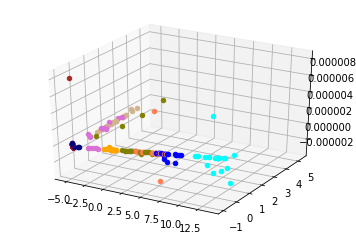

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(train_pred_pca.shape[0]):
    ax.scatter(train_pred_pca[i][0],
               train_pred_pca[i][1],
               train_pred_pca[i][2],
               c=colors[y_train[i]])
plt.show()

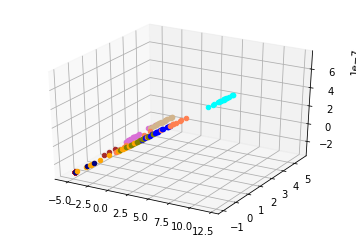

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(test_pred_pca.shape[0]):
    ax.scatter(test_pred_pca[i][0],
               test_pred_pca[i][1],
               test_pred_pca[i][2],
               c=colors[y_test[i]])
plt.show()